In [2]:
import pandas as pd
df = pd.read_csv('NYC_taxi.csv', parse_dates=['pickup_datetime'],nrows=500000)

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
# Range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

In [6]:
# Range of latitudes
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

In [7]:
df2 = df.copy(deep=True)
for lat in ['pickup_latitude','dropoff_latitude']:
    df2 = df2[(df2[lat]>nyc_min_latitude) & (df2[lat]<nyc_max_latitude)]

In [8]:
for long in ['pickup_longitude','dropoff_longitude']:
    df2 = df2[(df2[lat]>nyc_min_longitude) & (df2[lat]<nyc_max_longitude)]

In [9]:
landmarks = {'JFK Airport': (-73.78,40.643),'Laguardia Airport':(-73.87,40.77),'Midtown':(-73.98,40.76),
             'Lower Manhattan': (-74.00,40.72),'Upper Manhattan':(-73.94,40.82),'Brooklyn':(-73.95,40.66)}

In [10]:
import matplotlib.pyplot as plt

In [25]:
def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', 
                 markersize=15, alpha=1, color='r') # plot landmark location on map
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), 
                     color='r', backgroundcolor='w') # add 0.005 offset on landmark name for aesthetics purposes
  
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

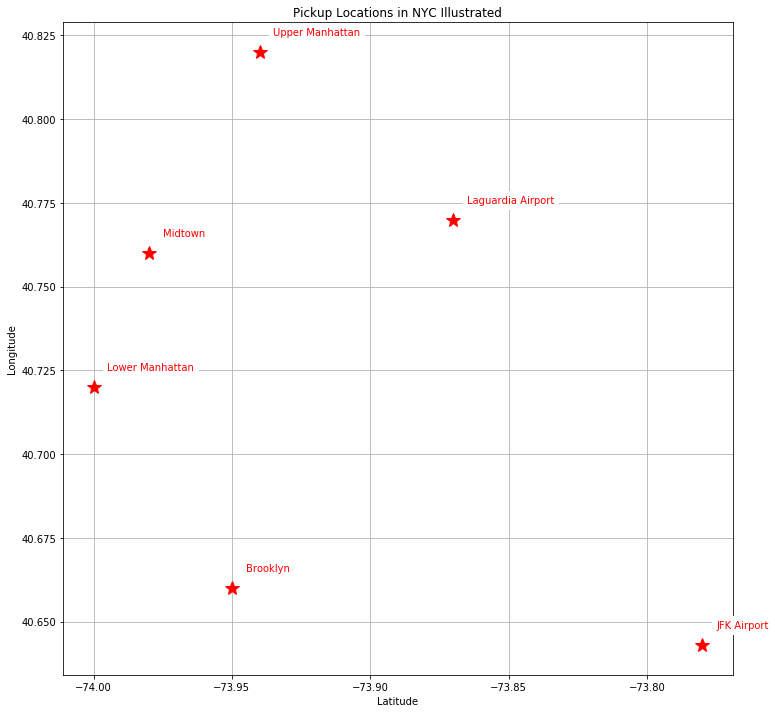

In [26]:
plot_lat_long(df2,landmarks,points='Pickup')

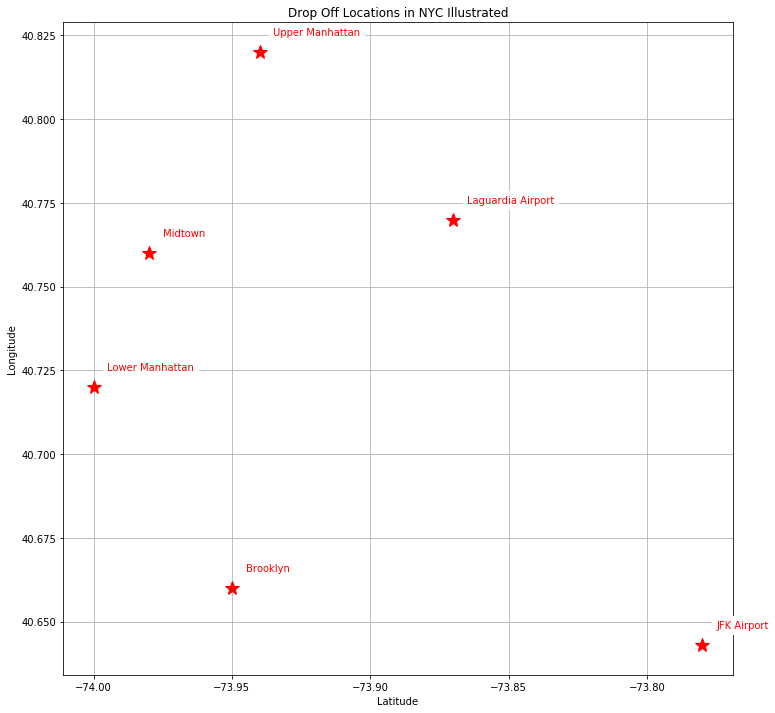

In [27]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [31]:
import numpy as np

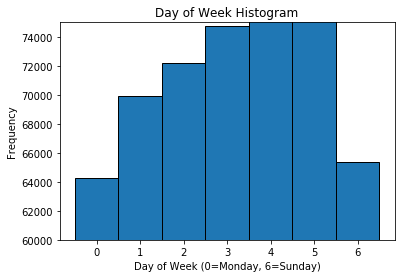

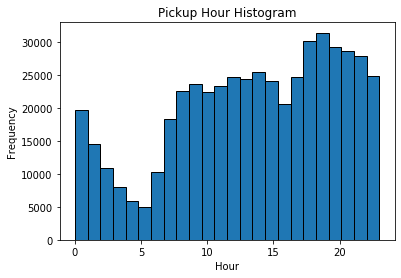

In [32]:
## Ridership by Day and Hour

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

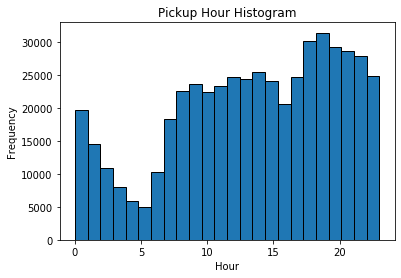

In [33]:
df['hour'].plot.hist(bins=24,ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

In [34]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

In [35]:
df=df.dropna()
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


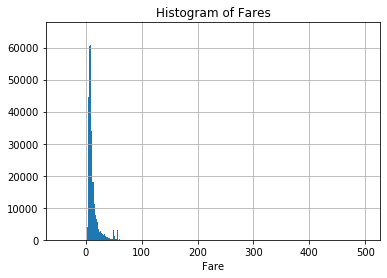

In [36]:
df['fare_amount'].hist(bins=500)
plt.xlabel('Fare')
plt.title('Histogram of Fares')
plt.show()

In [37]:
df=df[(df['fare_amount']>=0)&(df['fare_amount']<=100)]

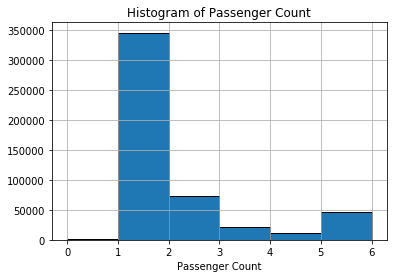

In [38]:
df['passenger_count'].hist(bins=6,ec='black')
plt.xlabel('Passenger Count')
plt.title('Histogram of Passenger Count')
plt.show()

In [39]:
df.loc[df['passenger_count']==0,'passenger_count']=1

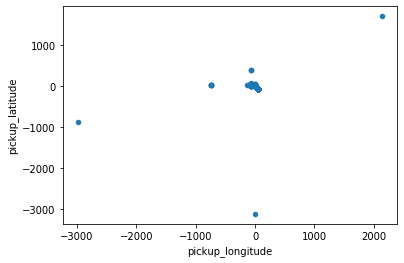

In [40]:
df.plot.scatter('pickup_longitude','pickup_latitude')
plt.show()

In [ ]:
for long in ['pickup_longitude','dropoff_longitude']: